# Ricky Doucette

## Milestone 2:

## Research question/interests

Ricky: I am interested in this dataset because I am a fan of hockey and like to see the statistical aspects of players' performances. I would like to find if there is a correlation between drops and increases in certain statistics for consecutive years for the top NHL players in points. Specific examples of research questions I would like to discover answers to are: Does an increase/decrease in time on ice per game relate to an increase in certain stats like overall points in the season? Do the top players that have a decrease in their offensive stats in a successive season make up for it with an increase in their defensive stats? How many of the top 250 players in points from the 2017-2018 season managed to make the top 350 players in points for the 2018-2019 season? How many of those players didn't make the top 350 just because they retired?

To get more specific, the research questions I would primarily like to answer are:
1. Does the average change in a top NHL player's offensive stats from one season to the next have a negative correlation with their defensive stats? That is if a player has a decrease in say points, do their stats like +/- and blocked shots tend to increase?
2. Does an increase in time on ice per game significantly increase a player's overall statistics? We could define significance as an extra point per additional minute of time on ice per game. So say a player plays 82 games both seasons. If in the first season they score 100 points with 18 minutes of TOI and the following season they score 115 points with 18.5 minutes of TOI, we could deem their increase in ice time as a significant factor in their increase in points. The calculations to determine this would be as follows:

In [69]:
import pandas as pd
nhl2017 = pd.read_csv('../data/processed/Data301ProjectData2017.csv')
nhl2018 = pd.read_csv('../data/processed/Data301ProjectData2018.csv')

In [70]:
s1 = (82*18)/100
s1

14.76

In [71]:
s2 = (82*18.5)/115
s2

13.191304347826087

In [72]:
s1-s2

1.568695652173913

We see here that in this example, the player was getting on average 1 point per 14.76 minutes they played in the first season, then 1 point per 13.19 minutes played in the second season. This is an increase in 1.57 points per minutes played.
If this player were to have had their TOI increased to 18.5 from 18, at the same pace of 1 point per 14.76 minutes played, they would have had about 103 points in the following season

## Milestone 3:

In [73]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
clean2017 = pd.read_csv('../data/processed/clean2017.csv')
clean2018 = pd.read_csv('../data/processed/clean2018.csv')


In [74]:
clean2017.shape

(225, 19)

In [75]:
clean2017.head()

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,3,17,0.342,0.646,0.987,256,10.60%,30,67
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,1,12,0.341,0.293,0.634,181,15.50%,40,25


In [76]:
clean2017.columns

Index(['Rk', 'Name', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'PPG', 'GWG',
       'PPP', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS', 'BS'],
      dtype='object')

In [77]:
clean2018.shape

(225, 19)

In [78]:
clean2018.head()

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,1,10,0.159,0.293,0.451,180,7.20%,114,88
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,3,13,0.220,0.293,0.512,122,14.80%,78,71
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,2,4,0.148,0.198,0.346,118,10.20%,86,21
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,5,31,0.427,0.744,1.171,206,17.00%,28,61
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,3,24,0.500,0.427,0.927,220,18.60%,35,26


In [79]:
clean2018.columns

Index(['Rk', 'Name', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'PPG', 'GWG',
       'PPP', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS', 'BS'],
      dtype='object')

In [80]:
clean2017.describe()

,Rk,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,119.337778,76.871111,20.382222,32.933333,53.315556,33.915556,2.457778,5.413333,3.324444,15.537778,0.265622,0.429458,0.695053,184.671111,72.395556,52.977778
std,71.573274,6.997213,8.879935,12.503571,16.995876,20.680973,14.962430,3.718054,2.174646,8.532482,0.113192,0.158882,0.213646,50.790170,43.783446,35.712323
min,1.000000,44.000000,5.000000,13.000000,32.000000,2.000000,-42.000000,0.000000,0.000000,0.000000,0.061000,0.171000,0.390000,70.000000,7.000000,14.000000
25%,57.000000,74.000000,14.000000,23.000000,40.000000,20.000000,-6.000000,3.000000,2.000000,9.000000,0.188000,0.304000,0.524000,149.000000,40.000000,28.000000
50%,119.000000,80.000000,19.000000,31.000000,49.000000,30.000000,2.000000,5.000000,3.000000,14.000000,0.244000,0.394000,0.646000,182.000000,61.000000,42.000000
75%,179.000000,82.000000,25.000000,41.000000,64.000000,43.000000,11.000000,7.000000,4.000000,21.000000,0.342000,0.526000,0.833000,214.000000,95.000000,64.000000
max,250.000000,82.000000,49.000000,68.000000,108.000000,187.000000,49.000000,20.000000,12.000000,42.000000,0.598000,0.893000,1.317000,355.000000,250.000000,203.000000


In [81]:
clean2018.describe()

,Rk,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,135.622222,74.982222,20.191111,32.395556,52.586667,33.404444,1.475556,4.844444,3.231111,14.360000,0.267382,0.432213,0.699578,176.862222,73.057778,50.364444
std,91.661082,9.212746,10.500166,14.268753,21.124267,20.500239,13.548872,4.190527,2.074486,9.188463,0.131830,0.177400,0.254368,55.109336,43.348167,34.845585
min,1.000000,33.000000,2.000000,9.000000,23.000000,4.000000,-41.000000,0.000000,0.000000,0.000000,0.027000,0.113000,0.309000,62.000000,5.000000,7.000000
25%,57.000000,72.000000,13.000000,22.000000,36.000000,20.000000,-8.000000,2.000000,2.000000,7.000000,0.171000,0.299000,0.494000,136.000000,42.000000,26.000000
50%,120.000000,78.000000,18.000000,28.000000,48.000000,28.000000,0.000000,4.000000,3.000000,13.000000,0.250000,0.402000,0.646000,176.000000,61.000000,40.000000
75%,201.000000,82.000000,27.000000,41.000000,69.000000,44.000000,12.000000,7.000000,5.000000,20.000000,0.354000,0.537000,0.862000,209.000000,98.000000,61.000000
max,347.000000,83.000000,51.000000,87.000000,128.000000,153.000000,39.000000,20.000000,10.000000,48.000000,0.630000,1.061000,1.561000,365.000000,235.000000,166.000000


In [82]:
clean2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      225 non-null    int64  
 1   Name    225 non-null    object 
 2   GP      225 non-null    int64  
 3   G       225 non-null    int64  
 4   A       225 non-null    int64  
 5   P       225 non-null    int64  
 6   PIM     225 non-null    int64  
 7   +/-     225 non-null    int64  
 8   TOI     225 non-null    object 
 9   PPG     225 non-null    int64  
 10  GWG     225 non-null    int64  
 11  PPP     225 non-null    int64  
 12  G/GP    225 non-null    float64
 13  A/GP    225 non-null    float64
 14  P/GP    225 non-null    float64
 15  SHOTS   225 non-null    int64  
 16  SH%     225 non-null    object 
 17  HITS    225 non-null    int64  
 18  BS      225 non-null    int64  
dtypes: float64(3), int64(13), object(3)
memory usage: 33.5+ KB


In [83]:
clean2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      225 non-null    int64  
 1   Name    225 non-null    object 
 2   GP      225 non-null    int64  
 3   G       225 non-null    int64  
 4   A       225 non-null    int64  
 5   P       225 non-null    int64  
 6   PIM     225 non-null    int64  
 7   +/-     225 non-null    int64  
 8   TOI     225 non-null    object 
 9   PPG     225 non-null    int64  
 10  GWG     225 non-null    int64  
 11  PPP     225 non-null    int64  
 12  G/GP    225 non-null    float64
 13  A/GP    225 non-null    float64
 14  P/GP    225 non-null    float64
 15  SHOTS   225 non-null    int64  
 16  SH%     225 non-null    object 
 17  HITS    225 non-null    int64  
 18  BS      225 non-null    int64  
dtypes: float64(3), int64(13), object(3)
memory usage: 33.5+ KB


In [85]:
from datetime import time

In [121]:
z = []
for i in clean2017.index:
    x = float(clean2017['TOI'][i][0:2])
    y = round(float(clean2017['TOI'][i][3:])/60,2)
    z.append(x+y)
z
clean2017['TOI_as_int'] = z
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121,23.37
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61,17.77
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18,13.32
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,3,17,0.342,0.646,0.987,256,10.60%,30,67,22.07
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,1,12,0.341,0.293,0.634,181,15.50%,40,25,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,18:43,8,6,16,0.524,0.427,0.951,184,23.40%,48,45,18.72
221,70,William Nylander,82,20,41,61,10,20,16:41,5,8,12,0.244,0.500,0.744,184,10.90%,21,18,16.68
222,56,Yanni Gourde,82,25,39,64,50,34,16:09,7,5,13,0.305,0.476,0.780,136,18.40%,57,42,16.15
223,178,Zach Hyman,82,15,25,40,37,22,17:21,0,2,0,0.183,0.305,0.488,148,10.10%,117,55,17.35


In [122]:
c = []
for i in clean2018.index:
    a = float(clean2018['TOI'][i][0:2])
    b = round(float(clean2018['TOI'][i][3:])/60,2)
    c.append(a+b)
clean2018['TOI_as_int'] = c
clean2018

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,1,10,0.159,0.293,0.451,180,7.20%,114,88,23.63
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,3,13,0.220,0.293,0.512,122,14.80%,78,71,16.45
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,2,4,0.148,0.198,0.346,118,10.20%,86,21,14.50
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,5,31,0.427,0.744,1.171,206,17.00%,28,61,22.35
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,3,24,0.500,0.427,0.927,220,18.60%,35,26,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,82,William Karlsson,82,24,32,56,16,1,18:50,7,5,14,0.293,0.390,0.683,169,14.20%,51,55,18.83
221,299,William Nylander,54,7,20,27,16,-4,15:30,1,0,6,0.130,0.370,0.500,130,5.40%,16,14,15.50
222,118,Yanni Gourde,80,22,26,48,66,9,15:50,5,5,9,0.275,0.325,0.600,130,16.90%,83,30,15.83
223,160,Zach Hyman,71,21,20,41,65,16,17:16,0,4,0,0.296,0.282,0.577,144,14.60%,102,39,17.27


In [123]:
clean2017['M/P'] = (clean2017['TOI_as_int']*clean2017['GP'])/clean2017['P']
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,...,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int,M/P
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,...,11,0.195,0.268,0.463,189,8.50%,69,121,23.37,50.430000
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,...,13,0.296,0.321,0.617,151,15.90%,61,61,17.77,28.787400
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,...,5,0.198,0.259,0.457,119,13.50%,91,18,13.32,29.160000
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,...,17,0.342,0.646,0.987,256,10.60%,30,67,22.07,22.352949
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,...,12,0.341,0.293,0.634,181,15.50%,40,25,14.80,23.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,18:43,8,...,16,0.524,0.427,0.951,184,23.40%,48,45,18.72,19.680000
221,70,William Nylander,82,20,41,61,10,20,16:41,5,...,12,0.244,0.500,0.744,184,10.90%,21,18,16.68,22.422295
222,56,Yanni Gourde,82,25,39,64,50,34,16:09,7,...,13,0.305,0.476,0.780,136,18.40%,57,42,16.15,20.692187
223,178,Zach Hyman,82,15,25,40,37,22,17:21,0,...,0,0.183,0.305,0.488,148,10.10%,117,55,17.35,35.567500


In [124]:
clean2018['M/P'] = (clean2018['TOI_as_int']*clean2018['GP'])/clean2018['P']
clean2018

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,...,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int,M/P
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,...,10,0.159,0.293,0.451,180,7.20%,114,88,23.63,52.369189
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,...,13,0.220,0.293,0.512,122,14.80%,78,71,16.45,32.116667
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,...,4,0.148,0.198,0.346,118,10.20%,86,21,14.50,41.946429
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,...,31,0.427,0.744,1.171,206,17.00%,28,61,22.35,19.090625
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,...,24,0.500,0.427,0.927,220,18.60%,35,26,17.70,19.097368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,82,William Karlsson,82,24,32,56,16,1,18:50,7,...,14,0.293,0.390,0.683,169,14.20%,51,55,18.83,27.572500
221,299,William Nylander,54,7,20,27,16,-4,15:30,1,...,6,0.130,0.370,0.500,130,5.40%,16,14,15.50,31.000000
222,118,Yanni Gourde,80,22,26,48,66,9,15:50,5,...,9,0.275,0.325,0.600,130,16.90%,83,30,15.83,26.383333
223,160,Zach Hyman,71,21,20,41,65,16,17:16,0,...,0,0.296,0.282,0.577,144,14.60%,102,39,17.27,29.906585


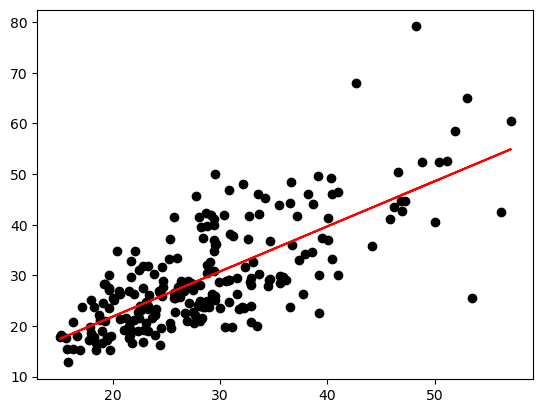

In [131]:
a, b = np.polyfit(clean2017['M/P'],clean2018['M/P'], 1)
plt.scatter(clean2017['M/P'],clean2018['M/P'], color = 'black')
plt.plot(clean2017['M/P'], a*clean2017['M/P']+b, color='red') 

In [138]:
sum(clean2018['M/P'] - clean2017['M/P'])/225

0.8809849880097818

In [139]:
list1 = (clean2018['M/P'] - clean2017['M/P'])

In [140]:
list1.mean()

0.8809849880097823

Since the slope is close to 1 but not equal to it and we wanted to see if the increase in points in a season 